In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [5]:
# sns.heatmap(df.isnull(),yticklabels=True,annot=True,cmap="RdYlGn")

<AxesSubplot:>

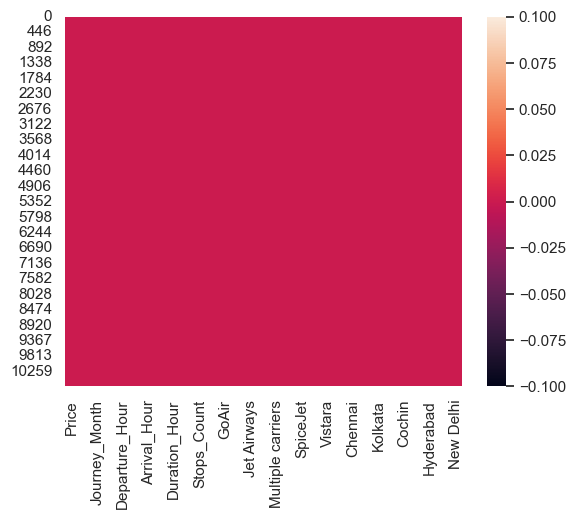

In [142]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()
# as you can see very less say 1-2 null values are there so we are going to drop these nan values rather than engineering on them

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# dropping all nan values...which in terms are only 2
df.dropna(inplace=True)
df.isnull().sum()
# no null value remaning in the program

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
# converting date_of_journey to day of journey explicitly
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [12]:
#converting date_of_journey to month of journey explicitly
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [18]:
#converting date_of_journey to year of journey explicitly
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.year

In [22]:
#droping date of journey since it has no relevance now cause of already extracted day...month...year
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [25]:
# converting departue to duration_hour and duration_minute explicitly
df["Departure_Hour"]=pd.to_datetime(df.Dep_Time).dt.hour
df["Departure_Minute"]=pd.to_datetime(df.Dep_Time).dt.minute
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25


In [26]:
#droping Dep_Time since it has no relevance now
df.drop(["Dep_Time"],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [27]:
# now working on arrival_time and converting it into minute and hour
df["Arrival_Hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_Minute"]=pd.to_datetime(df.Arrival_Time).dt.minute
#droping Arrival_Time since it has no relevance left now
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [48]:
# now working on duration column and seperating duration_hour and duration_minutes from it
#using list comprihension for subjecting and list for duration hour
dur_hr=[int(item[:item.find('h')]) for item in df.Duration ]
#using list comprihension for subjecting and list for duration minute
dur_min=[0 if (item.find("m")==-1) else int(item[item.find("h")+1:item.find("m")]) for item in df.Duration ]
#adding these both columns to the dataframe
df["Duration_Hour"]=dur_hr
df["Duration_Minute"]=dur_min

In [50]:
#now since there's no relevance for duration column...let's drop it
df.drop(["Duration"],axis=1,inplace=True)

In [59]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [62]:
#now working on total stops
#applying lambda function on stop function
df["Stops_Count"]=df.Total_Stops.apply(lambda x: 0 if x=="non-stop" else x[:x.find("s")-1])

In [64]:
#now since stops have been generated numerically let's drop Total_stop
df.drop(["Total_Stops"],axis=1,inplace=True)

In [66]:
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Stops_Count
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,2019,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2019,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2019,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,2019,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,2019,16,50,21,35,4,45,1


In [73]:
#a simple list comprihension for listing all the categorical data in a single line of script
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]
print(categorical_feature)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Stops_Count']


# now lets start working on categorical features and deal with them one-O-one

now as you all may be knowing there are 2 types of categorical feature

1.Nominal data--->where there is no relation or ordering relation btw the data's and thus oneHotEncoding is used[Dummies]
2.Ordinal data--->where data's usually have some ordering relation btw them and can be implemented by LabelEncoder

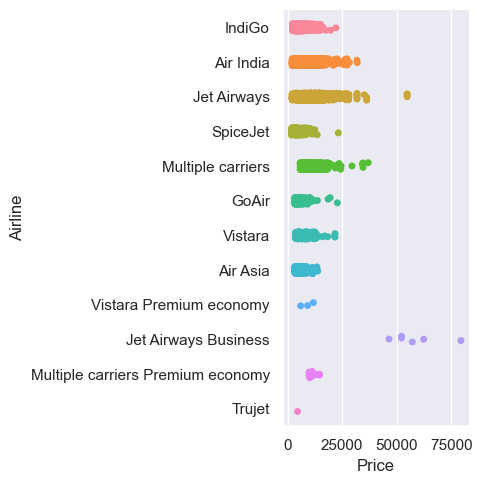

In [74]:
#starting off with airlines---nominal data
sns.catplot(x="Price",y="Airline",data=df)
#this shows approx range and even the outliers for a particular 

In [76]:
#here we'll be genrating dummie columns 
airline=df.Airline
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#now we'll concat this dataframe with original df and later drop Airline feature since already been used as dummie
df=pd.concat

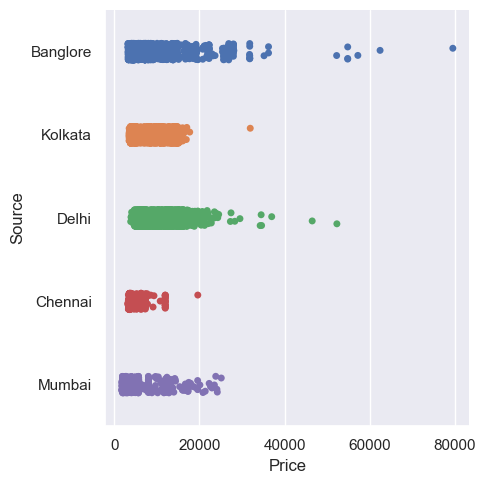

In [77]:
#nextly we have source feature---nominal feature
sns.catplot(x="Price",y="Source",data=df)

In [78]:
#now generating dummies of this feature
source=df.Source
source=pd.get_dummies(source,drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [79]:
#nextly we have destination
df.Destination.value_counts()
# which as you can see is a nominal feature...ran this value_sounts test cause i too wasn't sure what it is...but i'm now very sure it's a nominal feature too

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

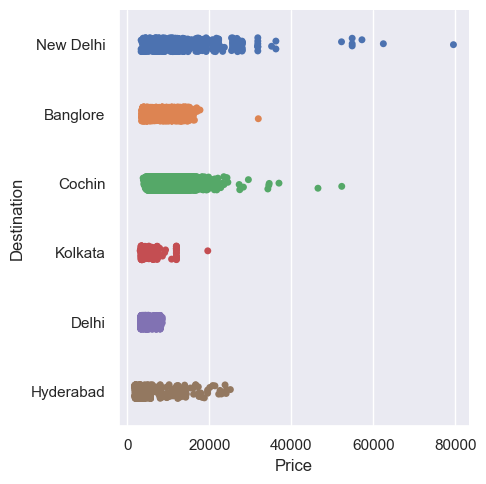

In [80]:
#analytics over destination and price
sns.catplot(x="Price",y="Destination",data=df)

In [82]:
#generating dummies for destination
destination=df.Destination
destination=pd.get_dummies(destination,drop_first=True)
destination.head(3)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0


In [ ]:
df.Route

In [89]:
#now working on route
#route has no significance in df since it has already been replaced by "Stops_Count"
df.drop(["Route"],axis=1,inplace=True)
df.head(1)

,Airline,Source,Destination,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Stops_Count
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,22,20,1,10,2,50,0


In [95]:
#now our last categorical feature,i.e, additiona_info
df.Additional_Info.value_counts()#will contain 80+% of data being "NO_INFO"
#since majority data is "no info"...let's dropp this feature since it won't affect the course of model that much
df.drop(["Additional_Info"],axis=1,inplace=True)
df.head(1)

,Airline,Source,Destination,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Stops_Count
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,22,20,1,10,2,50,0


In [96]:
#now let's concat out original df with "airline"--"source"--"destination" dummies columns and drop there respective original column
df=pd.concat([df,airline,source,destination],axis=1)
df.head(1)


,Airline,Source,Destination,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,22,20,1,...,0,0,0,0,0,0,0,0,0,1


In [97]:
#now let's drop those original dummies columns,i.e,categorical columns
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df.head(1)

,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1


In [98]:
df.shape

(10682, 31)

<AxesSubplot:>

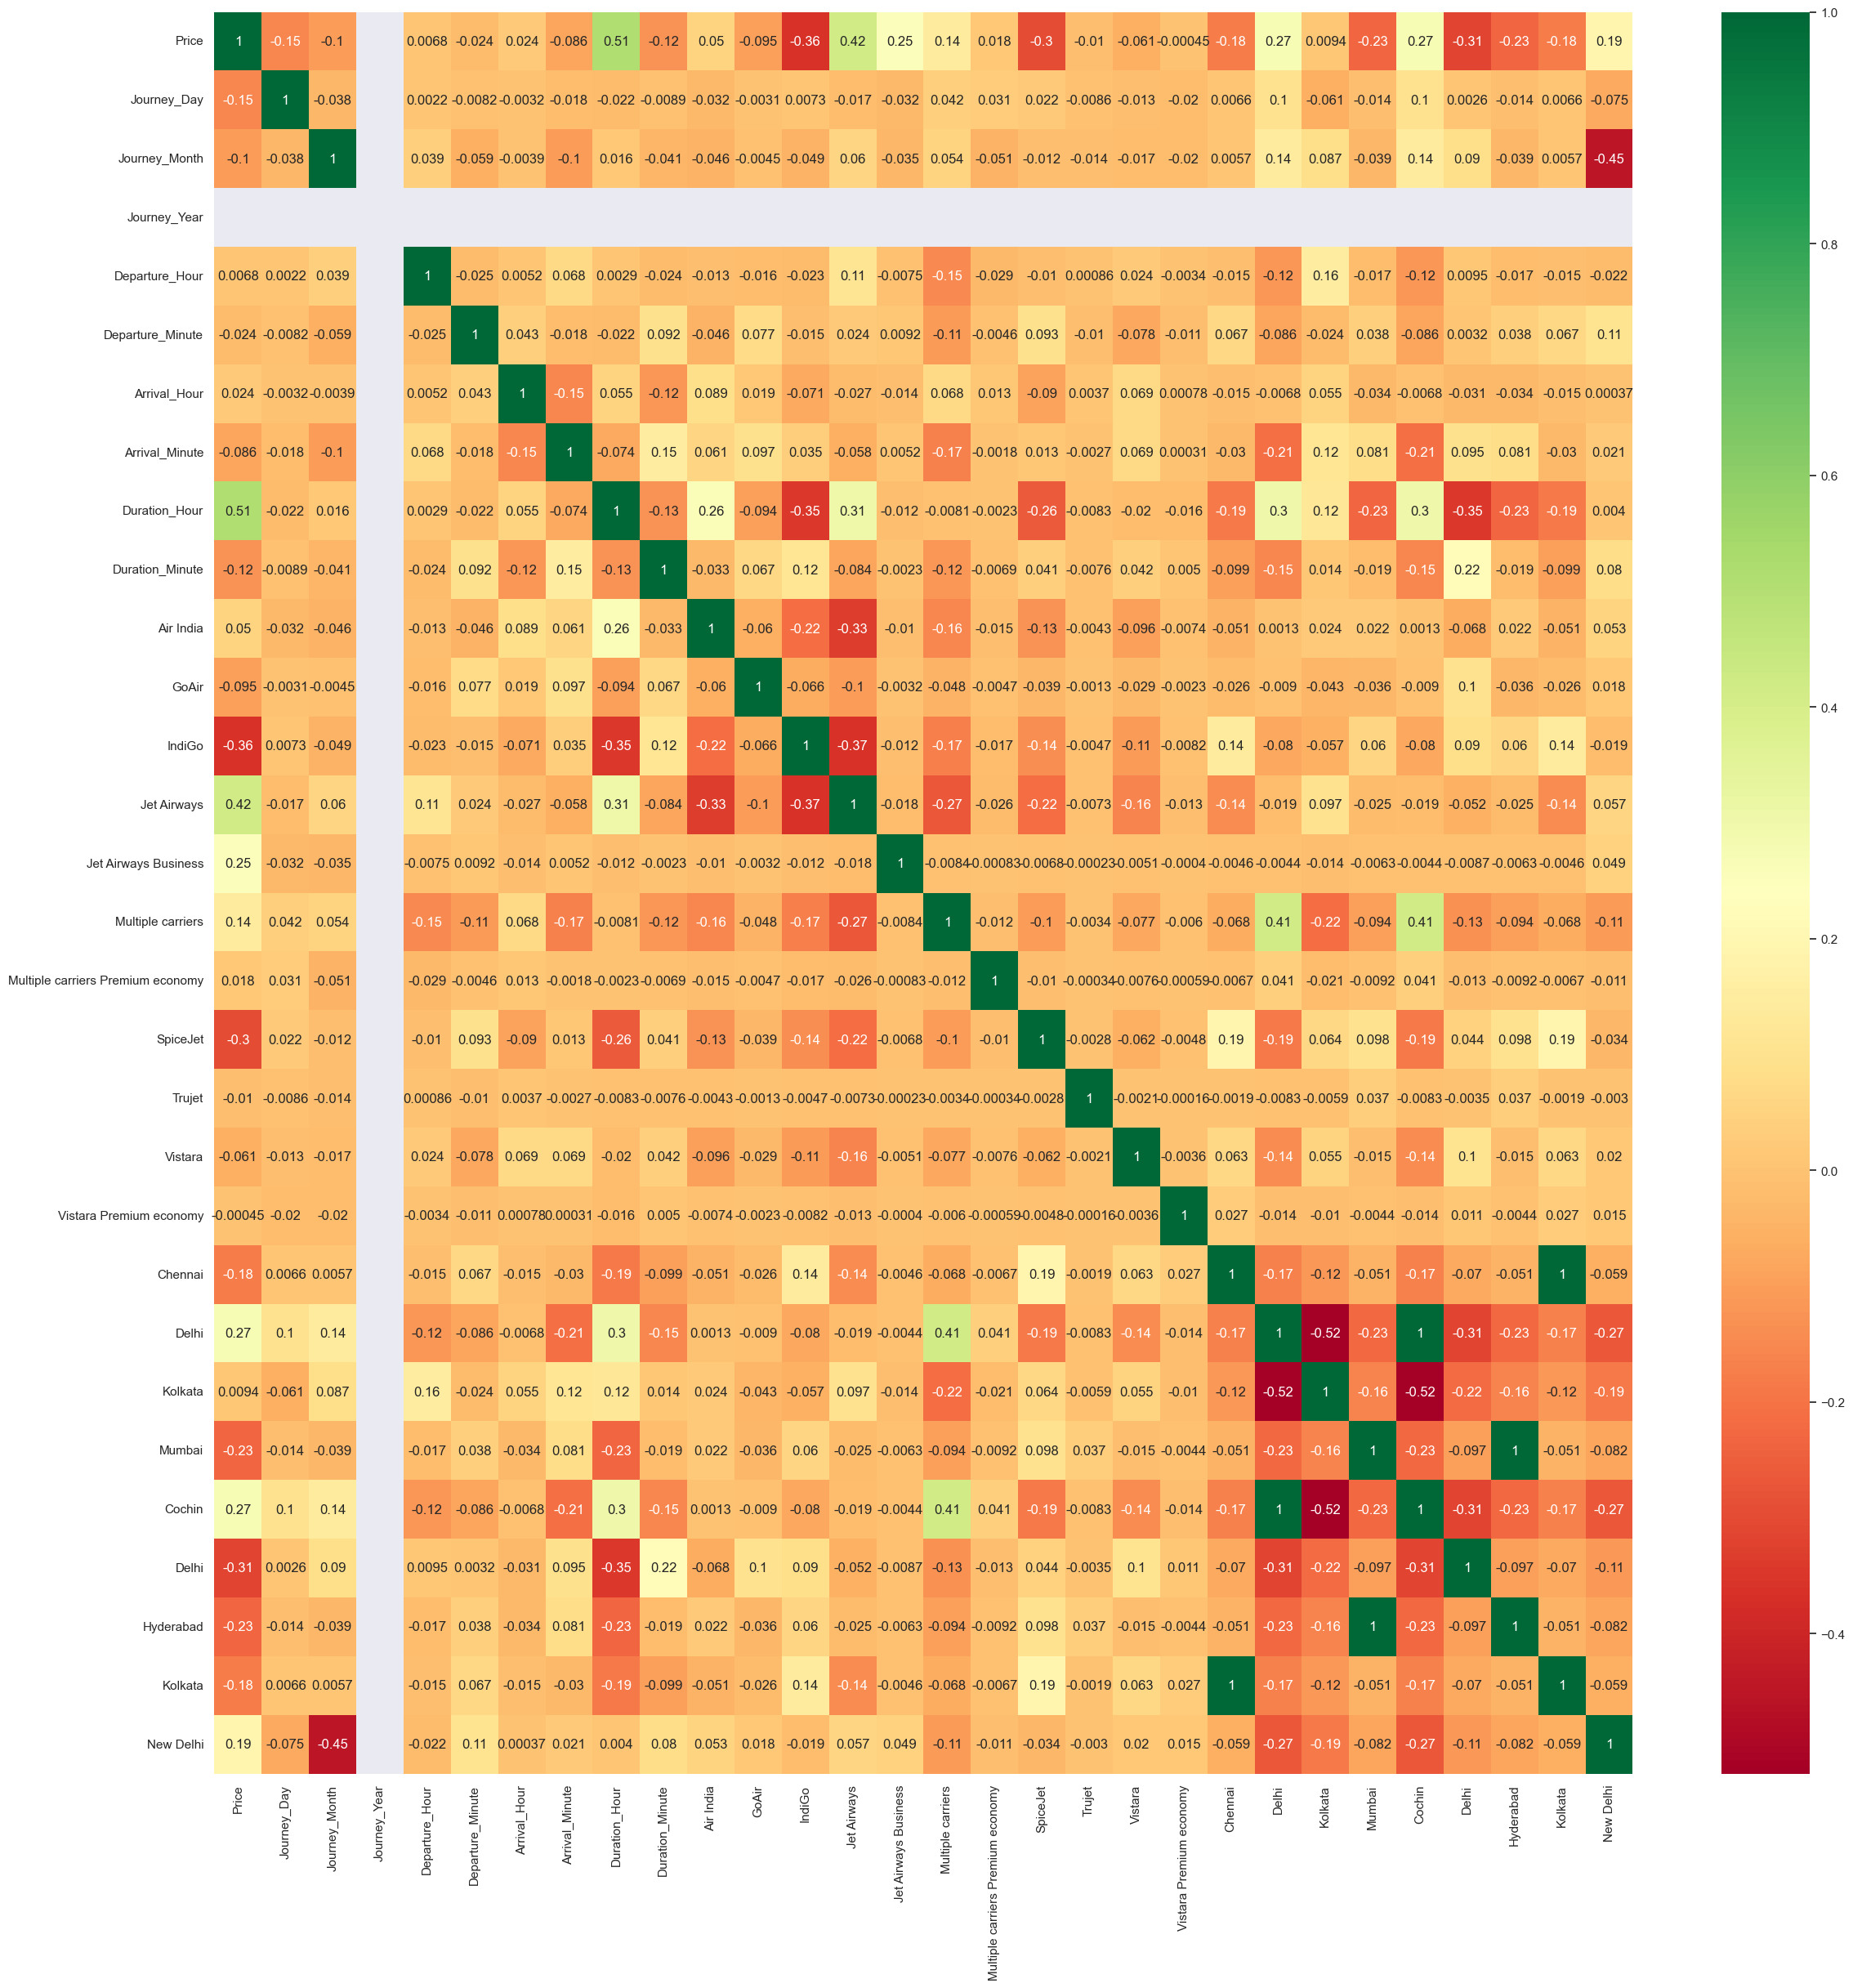

In [105]:
#let's try and get some furthur more co-relation insights using seaborn
plt.figure(figsize=(28,28))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [113]:
x=df.drop(["Price"],axis=1)
y=df.Price

In [114]:
#spliting my data using train test split technique in model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [115]:
#for finding some important feature let's use extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()

In [116]:
#now training this model on train data
model.fit(x_train,y_train)

ExtraTreesRegressor()

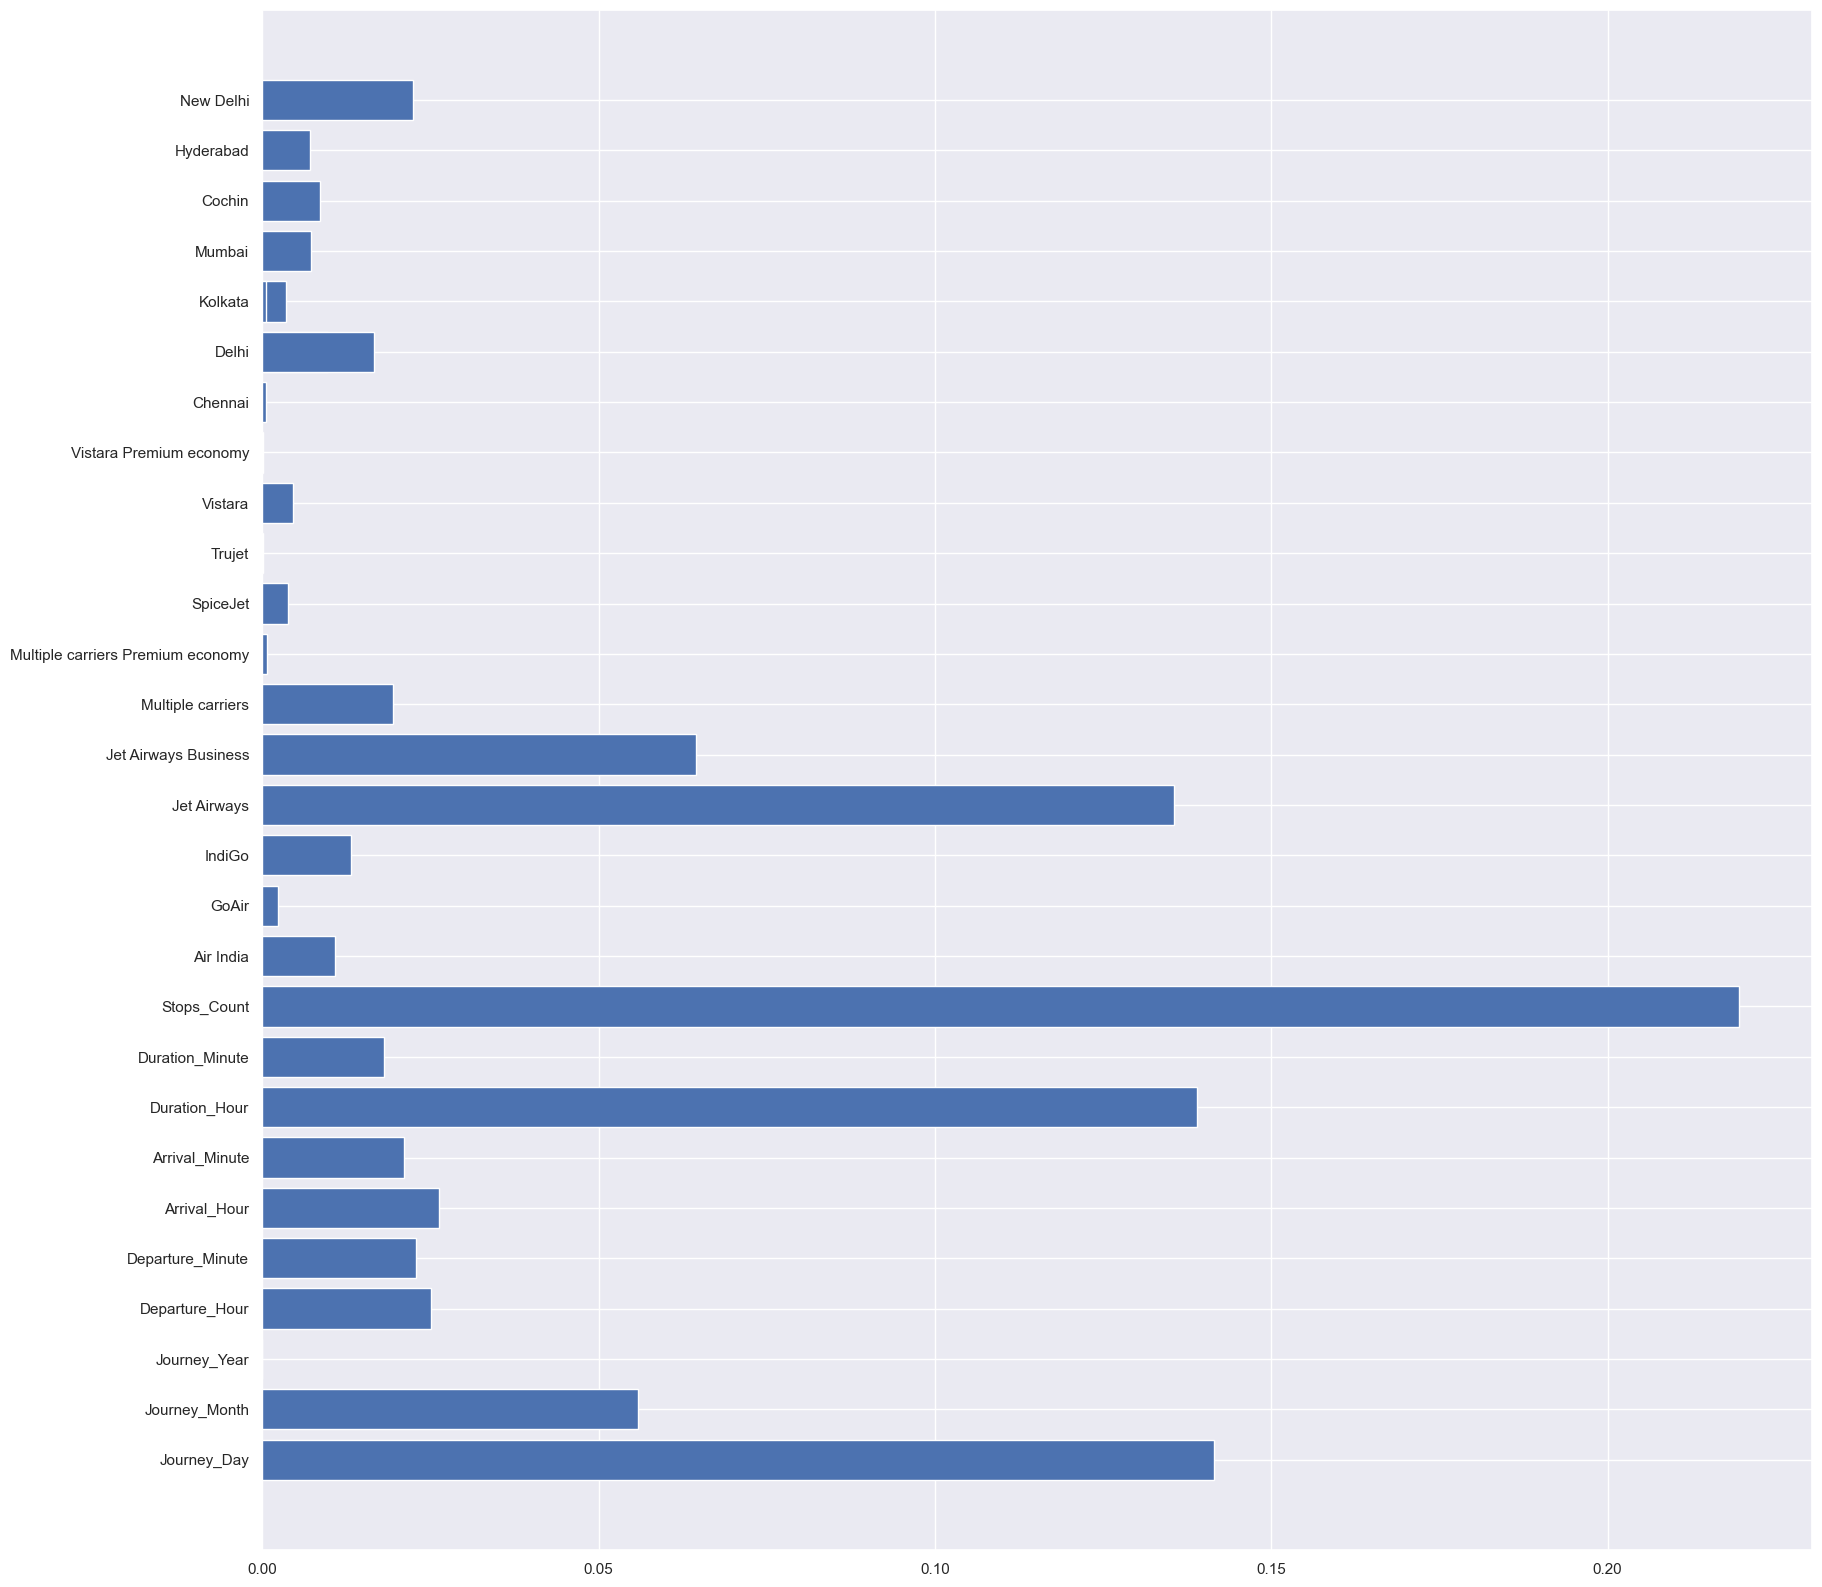

In [119]:
# important_feature=pd.DataFrame(model.feature_importances_,)
plt.figure(figsize=(20,20))
plt.barh(x.columns,model.feature_importances_)
plt.show()

In [120]:
#this is the accurracy we achieved through Extra trees regressor
model.score(x_test,y_test)

0.7986159958990714

In [122]:
#now trying with linear regressor
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [124]:
model2.fit(x_train,y_train)


LinearRegression()

In [125]:
model.score(x_test,y_test)

0.793733431129648

In [129]:
#now finally ending up with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=1000)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.782519405692598

In [130]:
predict=model3.predict(x_test)

<Figure size 1000x1000 with 0 Axes>

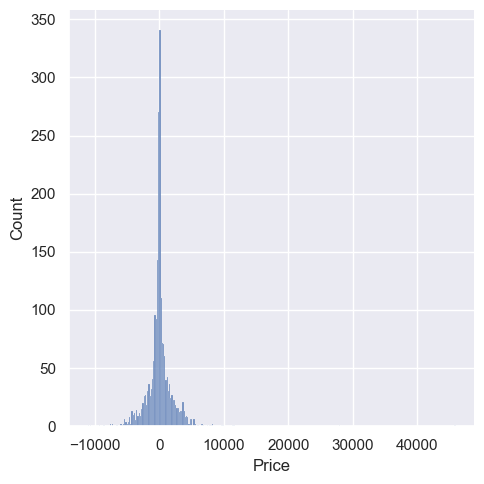

In [133]:
plt.figure(figsize=(10,10))
sns.displot(y_test-predict)
plt.show()

C:\Python37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

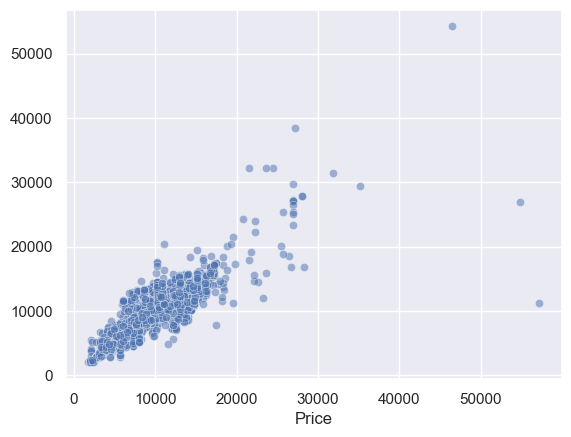

In [135]:
sns.scatterplot(y_test,predict,alpha=0.5)

# Now at the end let's look at hyperparameter tunning and try finding out the best combination for our model in random forest regressor() with which earlier we had got an accuracy of 78.25%

In [136]:
#hyperparameter tunning starts
from sklearn.model_selection import RandomizedSearchCV

In [137]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [138]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [139]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [140]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,n_jobs=1)

In [141]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   5.7s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   5.8s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   5.7s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   5.9s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   5.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  10.4s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  10.4s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  14.1s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  16.2s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  16.9s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=  26.5s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=  31.5s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=  21.3s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=  19.3s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=  21.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.8s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.9s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.8s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.9s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.4s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  20.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   8.7s
[CV] END max_depth=10, max_features

C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=  14.3s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=  14.2s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=  27.5s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=  27.9s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=  22.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  17.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  17.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  16.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  17.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  17.2s


C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [143]:
#these are the best hyper parametter tunning parameters
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [144]:
final_model=RandomForestRegressor(n_estimators=800,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=10)

In [145]:
#and finally fitting with train data and executing the prediction...althought it gives 1% less accuracy than linear regressor
final_model.fit(x_train,y_train)
predict=final_model.predict(x_test)
final_model.score(x_test,y_test)

C:\Python37\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.7824309183414131